In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [2]:
data_dir = r"D:\Data science\datasets\Emotions\test"


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5746 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.2166 - loss: 1.8687 - val_accuracy: 0.2472 - val_loss: 1.8108
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.2393 - loss: 1.8194 - val_accuracy: 0.2577 - val_loss: 1.7562
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.2932 - loss: 1.7479 - val_accuracy: 0.3513 - val_loss: 1.6541
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3388 - loss: 1.6747 - val_accuracy: 0.3813 - val_loss: 1.6002
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3870 - loss: 1.6047 - val_accuracy: 0.3841 - val_loss: 1.5497
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4032 - loss: 1.5495 - val_accuracy: 0.4029 - val_loss: 1.5355
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4168 - loss: 1.5019 - val_accuracy: 0.4141 - val_loss: 1.5020
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4439 - loss: 1.4405 - val_accuracy: 0.435

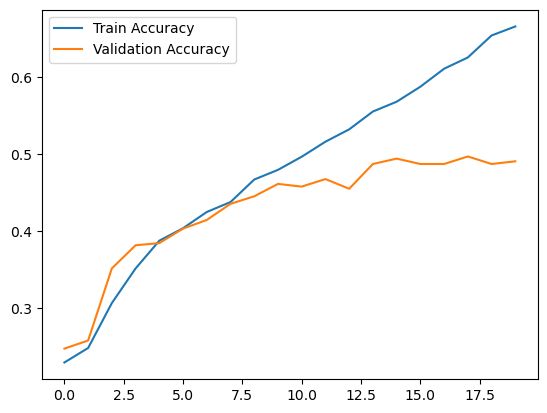

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [8]:
model.save("emotion_model.h5")


In [5]:
import random
import numpy as np
import cv2
from tensorflow.keras.models import load_model

import os
import matplotlib.pyplot as plt
model = load_model('nationality_model.h5')
print("Model loaded successfully!")

Model loaded successfully!


In [6]:
img_path = "sbb.jpg"

In [3]:
# Pick a random emotion folder
emotion_folder = random.choice(os.listdir(train_dir))
emotion_path = os.path.join(train_dir, emotion_folder)

# Pick a random image from that folder
random_image = random.choice(os.listdir(emotion_path))
image_path = os.path.join(emotion_path, random_image)

print(f"Random Image Path: {image_path}")
print(f"Actual Emotion: {emotion_folder}")


NotADirectoryError: [WinError 267] The directory name is invalid: 'sbb.jpg'

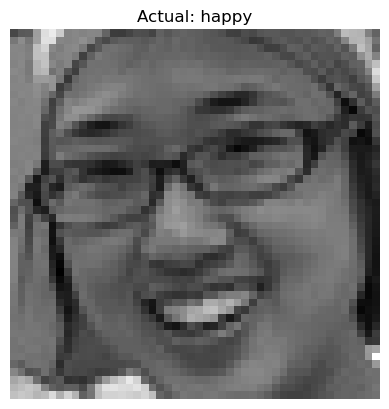

In [18]:
# Load and preprocess the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (48, 48))
img_normalized = img_resized.reshape(1, 48, 48, 1) / 255.0

# Show the image
plt.imshow(img_resized, cmap='gray')
plt.title(f"Actual: {emotion_folder}")
plt.axis('off')
plt.show()
